In [2]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas 

from lib import loading

df = loading.load_data()
df = df[df['airline_sentiment'] != 'neutral']
print("We have {0} labelled examples.".format(len(df)))

Read the data file from ./airline-twitter-sentiment/Tweets.csv
We have 11541 labelled examples.


## We will try various classification algorithms
### This time we only have positive and negative labeled tweets

We will try the following:
* Naive Bayes
* kNearest Neighbours
* SVM
* SVM with Gradient Descent

We mention that in this docuemnt we take the best options that we have found, after exploring the hyperparameter space for each algorithm in its own separate Notebook.

In [3]:
from lib import processing

training_data, testing_data = processing.process_data(df, sample_size=1)

Using a total of 11541 tweets
Training sample size: 10331
Testing sample size: 1210


In [4]:
from sklearn.metrics import confusion_matrix
from lib import classify
from nltk.sentiment import SentimentAnalyzer

sentim_analyzer = SentimentAnalyzer()
classify.add_features(training_data, sentim_analyzer)
train, test = classify.extract_features(training_data, testing_data, sentim_analyzer)

def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['negative', 'positive'], rotation=45)
    plt.yticks(tick_marks, ['negative', 'positive'])
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def print_evaluation(evaluation):
    for key, value in sorted(evaluation.items()):
        print(key, ":", value)

def evaluate_trainer(trainer):
    classifier, evaluation, _ = classify.train_model(train, test, sentim_analyzer, trainer)
    y_test = [y for _, y in test]
    y_pred = [classifier.classify(f) for f, _ in test]
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm)
    print_evaluation(evaluation)
    return classifier

Unigram features 1471
Bigram features:  983


## Naive Bayes

Training: Naive Bayes Classifier
Training classifier
Evaluating SklearnClassifier results...
Accuracy : 0.9145873320537428
F-measure [negative] : 0.9458307973219721
F-measure [positive] : 0.7981859410430838
Precision [negative] : 0.9464068209500609
Precision [positive] : 0.7963800904977375
Recall [negative] : 0.9452554744525548
Recall [positive] : 0.8


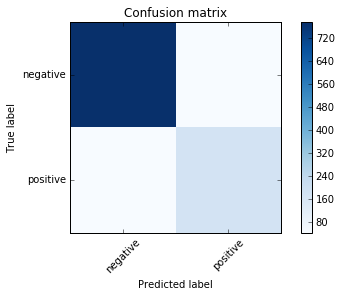

In [15]:
from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import BernoulliNB

trainer = {
    'name': 'Naive Bayes Classifier',
    'train': SklearnClassifier(BernoulliNB(
        fit_prior = True,
        alpha = 0,
        )).train,
}
naive_bayes = evaluate_trainer(trainer)


## K Nearest Neighbours

Training: K Nearest Neighbours Classifier
Training classifier
Evaluating SklearnClassifier results...
Accuracy : 0.8234165067178503
F-measure [negative] : 0.8880778588807786
F-measure [positive] : 0.5818181818181818
Precision [negative] : 0.8880778588807786
Precision [positive] : 0.5818181818181818
Recall [negative] : 0.8880778588807786
Recall [positive] : 0.5818181818181818


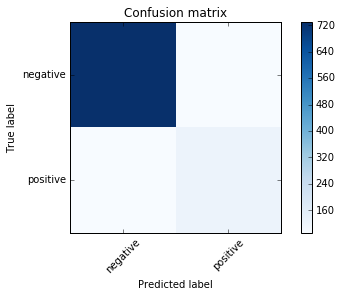

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from nltk.classify import SklearnClassifier
trainer = {
    "name": "K Nearest Neighbours Classifier",
    "train": SklearnClassifier(KNeighborsClassifier()).train,
}
knn = evaluate_trainer(trainer)

## SVM

Training: Linear SVC Classifier
Training classifier
Evaluating SklearnClassifier results...
Accuracy : 0.9090909090909091
F-measure [negative] : 0.9421661409043114
F-measure [positive] : 0.7876447876447877
Precision [negative] : 0.9461457233368532
Precision [positive] : 0.7756653992395437
Recall [negative] : 0.9382198952879581
Recall [positive] : 0.8


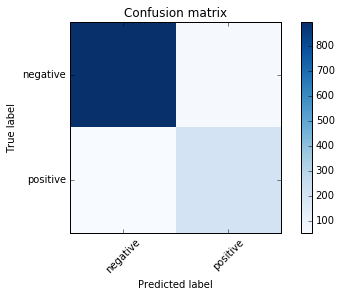

In [7]:
from sklearn.svm import LinearSVC
from nltk.classify import SklearnClassifier
trainer = {
    "name": "Linear SVC Classifier",
    "train": SklearnClassifier(LinearSVC(dual = False, # because number of samples > number of features,
                                         C = 2,
                                        )).train,
}
svm = evaluate_trainer(trainer)